# pandas youtube tutorial

- Original: [7. Pandas - IPython Notebook Tutorial](https://www.youtube.com/watch?v=04zBNE2ZHSI)
- [ipython notebook](http://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/IPython-Tutorial/7%20-%20Pandas.ipynb)

# ライブラリの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Series

シリーズは配列のようなオブジェクト。

`pd.Series(self, data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)`

In [2]:
x = pd.Series([1, 2, 3, 4, 5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 基本的な処理

In [3]:
x + 100

0    101
1    102
2    103
3    104
4    105
dtype: int64

In [4]:
(x ** 2) + 100

0    101
1    104
2    109
3    116
4    125
dtype: int64

In [5]:
x > 2

0    False
1    False
2     True
3     True
4     True
dtype: bool

## any() and all()

In [10]:
larger_than_2 = x > 2

In [11]:
larger_than_2.any()

True

In [12]:
larger_than_2.all()

False

## apply()

In [13]:
def f(x):
    if x % 2 == 0:
        return x * 2
    else:
        return x * 3
    
x.apply(f)

0     3
1     4
2     9
3     8
4    15
dtype: int64

### Avoid looping over your data

In [14]:
%%timeit

ds = pd.Series(range(10000))

for counter in range(len(ds)):
    ds[counter] = f(ds[counter])

10 loops, best of 3: 140 ms per loop


In [15]:
%%timeit

ds = pd.Series(range(10000))

ds = ds.apply(f)

100 loops, best of 3: 7.46 ms per loop


## astype()

In [16]:
x.astype(np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

## copy()

In [17]:
y = x

In [18]:
y[0]

1

In [19]:
y[0] = 100

In [20]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [21]:
x

0    100
1      2
2      3
3      4
4      5
dtype: int64

### copyの使用は最小限にすべし（メモリの使用）

In [22]:
y = x.copy()

In [23]:
x[0] = 1

In [24]:
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [25]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [26]:
x.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

# DataFrame

`pd.DataFrame(self, data=None, index=None, columns=None, dtype=None, copy=False)`

In [27]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
df = pd.DataFrame(data, columns=["x"])

In [28]:
df

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


## Selecting Data

In [29]:
df["x"]

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: x, dtype: int64

In [30]:
df["x"][0]

1

## Adding extra columns

In [31]:
df["x_plus_2"] = df["x"] + 2

In [32]:
df

,x,x_plus_2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8
6,7,9
7,8,10
8,9,11


In [33]:
df["x_square"] = df["x"] ** 2

In [34]:
df["x_factorial"] = df["x"].apply(np.math.factorial)

In [35]:
df

,x,x_plus_2,x_square,x_factorial
0,1,3,1,1
1,2,4,4,2
2,3,5,9,6
3,4,6,16,24
4,5,7,25,120
5,6,8,36,720
6,7,9,49,5040
7,8,10,64,40320
8,9,11,81,362880


In [36]:
df["is_even"] = df["x"] % 2 == 0

In [37]:
df

,x,x_plus_2,x_square,x_factorial,is_even
0,1,3,1,1,False
1,2,4,4,2,True
2,3,5,9,6,False
3,4,6,16,24,True
4,5,7,25,120,False
5,6,8,36,720,True
6,7,9,49,5040,False
7,8,10,64,40320,True
8,9,11,81,362880,False


## map()

In [38]:
df["odd_even"] = df["is_even"].map({False:"odd", True:"even"})

In [39]:
df

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,False,odd
1,2,4,4,2,True,even
2,3,5,9,6,False,odd
3,4,6,16,24,True,even
4,5,7,25,120,False,odd
5,6,8,36,720,True,even
6,7,9,49,5040,False,odd
7,8,10,64,40320,True,even
8,9,11,81,362880,False,odd


## drop()

In [40]:
df = df.drop("is_even", axis=1)

In [41]:
df

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
4,5,7,25,120,odd
5,6,8,36,720,even
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


## Multi Column Select

In [42]:
df[["x", "odd_even"]] # two bracket

,x,odd_even
0,1,odd
1,2,even
2,3,odd
3,4,even
4,5,odd
5,6,even
6,7,odd
7,8,even
8,9,odd


## Controlling display options

In [45]:
pd.options.display.max_columns = 60
pd.options.display.max_rows = 6
pd.options.display.notebook_repr_html = True

In [46]:
df

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
...,...,...,...,...,...
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


## Filtering

In [47]:
df[df["odd_even"] == "odd"]

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
2,3,5,9,6,odd
4,5,7,25,120,odd
6,7,9,49,5040,odd
8,9,11,81,362880,odd


In [48]:
df[df.odd_even == "even"]

,x,x_plus_2,x_square,x_factorial,odd_even
1,2,4,4,2,even
3,4,6,16,24,even
5,6,8,36,720,even
7,8,10,64,40320,even


## Chaining Filters

### | OR

In [49]:
df[(df.odd_even == "even") | (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
5,6,8,36,720,even
7,8,10,64,40320,even


In [50]:
df[(df.odd_even == "even") & (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,odd_even
1,2,4,4,2,even
3,4,6,16,24,even


### Further Chaining

In [51]:
df[(df.odd_even == "even") & (df.x_square < 20)]["x_plus_2"][:1]

1    4
Name: x_plus_2, dtype: int64

## Scatter_matrix()

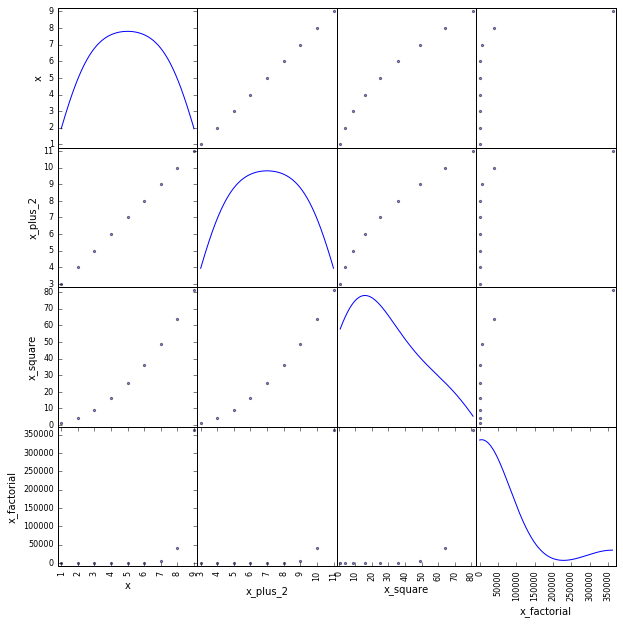

In [53]:
pd.scatter_matrix(df, 
                  diagonal="kde", 
                  #diagonal="hist", 
                  figsize=(10, 10));

In [54]:
df.describe()

,x,x_plus_2,x_square,x_factorial
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,7.000000,31.666667,45457.000000
std,2.738613,2.738613,28.080242,119758.341137
...,...,...,...,...
50%,5.000000,7.000000,25.000000,120.000000
75%,7.000000,9.000000,49.000000,5040.000000
max,9.000000,11.000000,81.000000,362880.000000


In [55]:
url = "http://www.google.com/finance/historical?q=TADAWUL:TASI&output=csv"

In [57]:
stocks_data = pd.read_csv(url)

In [58]:
stocks_data

,﻿Date,Open,High,Low,Close,Volume
0,13-Oct-16,5692.66,5754.31,5681.84,5693.96,248618935
1,12-Oct-16,5655.61,5721.78,5637.95,5692.66,192793425
2,11-Oct-16,5574.22,5679.56,5568.60,5655.61,216051440
...,...,...,...,...,...,...
246,20-Oct-15,7765.22,7769.84,7678.39,7689.76,201544837
247,19-Oct-15,7792.62,7793.61,7750.49,7765.22,213313899
248,18-Oct-15,7698.73,7800.10,7699.53,7792.62,222717069


In [60]:
stocks_data["change_amount"] = stocks_data["Close"] - stocks_data["Open"]

In [61]:
stocks_data["change_percentage"] = stocks_data["change_amount"] / stocks_data["Close"]

In [62]:
stocks_data

,﻿Date,Open,High,Low,Close,Volume,change_amount,change_percentage
0,13-Oct-16,5692.66,5754.31,5681.84,5693.96,248618935,1.30,0.000228
1,12-Oct-16,5655.61,5721.78,5637.95,5692.66,192793425,37.05,0.006508
2,11-Oct-16,5574.22,5679.56,5568.60,5655.61,216051440,81.39,0.014391
...,...,...,...,...,...,...,...,...
246,20-Oct-15,7765.22,7769.84,7678.39,7689.76,201544837,-75.46,-0.009813
247,19-Oct-15,7792.62,7793.61,7750.49,7765.22,213313899,-27.40,-0.003529
248,18-Oct-15,7698.73,7800.10,7699.53,7792.62,222717069,93.89,0.012049
